In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
metrics = pd.read_csv("metrics.csv")

# Add index column
metrics["index"] = metrics.index

<Axes: title={'center': 'Scores over epochs'}, xlabel='Epochs', ylabel='value'>

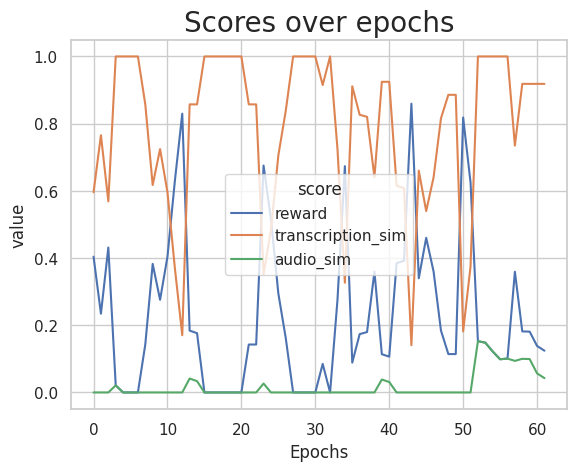

In [23]:
# Plotting the data, with the x-axis being the number of epochs and the y-axis being the scores of reward, audio_sim and transcription_sim
# fig, ax = plt.subplots()
# ax.set(xlabel="Epochs", ylabel="Scores")
plt.title("Scores over epochs", fontsize=20)

sns.set_theme(style="whitegrid", palette="deep")

plt.xlabel("Epochs")
plt.locator_params(axis='x', integer=True)

data = metrics.drop(columns=["epoch"])
data = data.melt('index', var_name='score', value_name='value')
sns.lineplot(x='index', y='value', hue='score', data=data)

